Importaciones necesarias para el modelo  y carga del dataset

In [ ]:
from google.colab import drive
import tensorflow as tf
import os

drive.mount('/content/drive')
dataset = '/content/drive/My Drive/Fruits Classification'





Mounted at /content/drive


Copia de las carpetas alojadas en el drive  y cargadas en el entorno de colab

In [ ]:
!cp -r "/content/drive/My Drive/Fruits Classification/valid" /content/valid_local
!cp -r "/content/drive/My Drive/Fruits Classification/test" /content/test_local
!cp -r "/content/drive/My Drive/Fruits Classification/train" /content/train_local


Este dataset trata de 3 directorios diferentes los cuales se dividen en :


*   Validación
*   Entrenamiento
*   Testeo

Dentro de estos directorios se encuentran las  imagenes con las que vamos a entrenar el modelo convolucional  ,las cuales se dividen en 5 clases


1.  Apple (Manzana)
2.  Banana (Platano)
3.  Grape  (Uva)
4.  Mango   (Mango)
5.  Strawberry (Fresa)



In [ ]:
import tensorflow as tf
entrenamiento = tf.keras.utils.image_dataset_from_directory(
    "/content/train_local",
    image_size=(128, 128),     # Reescalado aquí
    batch_size=32 # Cantidad de muestras que la red procesa juntas antes de actualizar los pesos
)

import numpy as np

x_train = []
y_train = []

for images, labels in entrenamiento:
    x_train.extend(images.numpy())   # Convertimos a NumPy arrays y acumulamos
    y_train.extend(labels.numpy())

# Convertimos las listas a arrays NumPy finales
x_train = np.array(x_train)
y_train = np.array(y_train)


Found 9700 files belonging to 5 classes.


In [ ]:
testeo = tf.keras.utils.image_dataset_from_directory(
    "/content/test_local",
    image_size=(128, 128),     # Reescalado aquí
    batch_size=32 # Cantidad de muestras que la red procesa juntas antes de actualizar los pesos
)

import numpy as np

x_test = []
y_test = []

for images, labels in entrenamiento:
    x_test.extend(images.numpy())   # Convertimos a NumPy arrays y acumulamos
    y_test.extend(labels.numpy())

# Convertimos las listas a arrays NumPy finales
x_test = np.array(x_test)
y_test = np.array(y_test)

Found 100 files belonging to 5 classes.


Lo primero que hacemos en las siguientes líneas de codigo es transformar las variables objetivo de entrenamiento y de testeo ,de imagenes a variables categoricas ,para que el modelo sepa diferenciar las 5 categorias que queremos

Lo siguieente es crear el modelo secuencial ,compilarlo y sacar las metricas de evaluación

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Rescaling,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

y_train_cat = to_categorical(y_train, 5)# Convertir a categoricas las variables objetivo 
y_test_cat = to_categorical(y_test, 5)

model = Sequential([ #Entrenamos el modelo secuencial
    Rescaling(1./255, input_shape=(128, 128, 3)),# Entrada y rescalado de los inputs 

    Conv2D(128, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu' , strides=(2, 2), padding='same'),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

early_stop = EarlyStopping( monitor='val_loss',patience=5,restore_best_weights=True )

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_cat, epochs=100, batch_size=64, validation_split=0.1,verbose=0 )

test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")



Test accuracy: 0.9688


Este codigo muestra una serie de predicciones del modelo  y las greafica

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


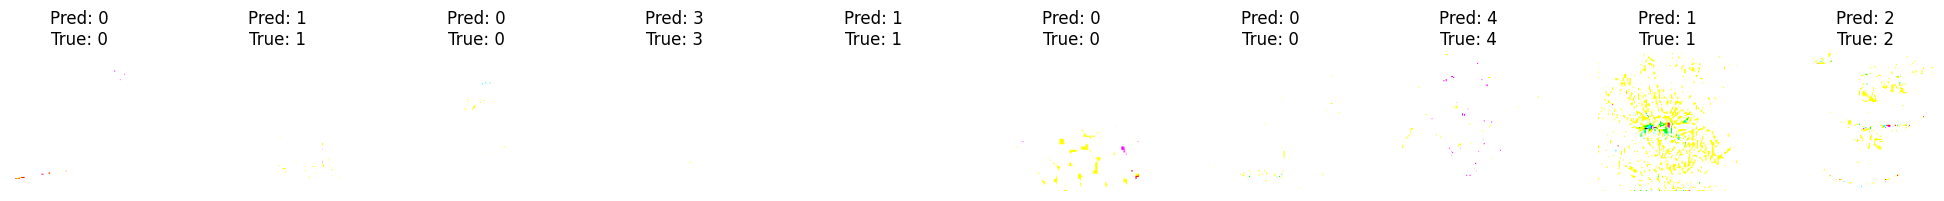

In [ ]:
import matplotlib.pyplot as plt

#  Visualizar predicciones
predictions = model.predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = y_test[:10].flatten()

# Visualizar primeras predicciones
preds = model.predict(x_test[:10])
predicted_labels = np.argmax(preds, axis=1)
true_labels = y_test[:10].flatten()

fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i, ax in enumerate(axes):
    ax.imshow(x_test[i])
    ax.axis('off')
    ax.set_title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}")
plt.tight_layout()
plt.show()


Este codigo ejecuta otro tipo de estructura/arquitectura  del modelo para comprobar si esto altera el trendimiento del modelo

In [ ]:
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping


#Segunda prueba con modelo funcional 

input = Input(shape=(128, 128, 3))
x = Rescaling(1./255)(input)

x = Conv2D(128, (3, 3), activation='relu', strides=(2, 2), padding='same')(x)
x = MaxPooling2D()(x)

x = Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same')(x)
x = MaxPooling2D()(x)

x = Conv2D(32, (3, 3), activation='relu', strides=(2, 2), padding='same')(x)
x = GlobalAveragePooling2D()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(5, activation='softmax')(x)

model = Model(inputs=input, outputs=output)


Compilación del modelo anterior y comprobación de la precición del modelo

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, 5)
y_test_cat = to_categorical(y_test, 5)
early_stop = EarlyStopping( monitor='val_loss',patience=5,restore_best_weights=True )


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_cat, epochs=100, batch_size=64, validation_split=0.1,verbose=0 )

test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")


Test accuracy: 0.9423


Por ultimo creación  de otra arquitectura tipo resnet en la que se utilizan residual_block

In [ ]:
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.layers import Add, ReLU
from tensorflow.keras.models import Model


"""
    Crea un bloque residual como en ResNet

    Parámetros
    - x: Tensor de entrada
    - filters: Número de filtros para las capas Conv2D
    - kernel_size: Tamaño del kernel para las convoluciones
    - strides: Paso de la convolución

    Devuelve un tensor con la salida residual.
    """


def residual_block(x, filters, kernel_size=(3,3), strides=(1,1)):

        


    
    shortcut = x # Guardamos la entrada original para la conexión residual 
    x = Conv2D(filters, kernel_size, padding='same', strides=strides, activation='relu')(x)
    x = Conv2D(filters, kernel_size, padding='same')(x)

    # Si la dimensión espacial o el número de canales cambia, ajustamos el shortcut
    if strides != (1,1) or shortcut.shape[-1] != filters:
        # Convolución 1x1 para que el shortcut tenga las mismas dimensiones que x
        shortcut = Conv2D(filters, (1,1), padding='same', strides=strides)(shortcut)
    
    # Suma del camino principal y el shortcut
    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x


input = Input(shape=(128, 128, 3))
x = Rescaling(1./255)(input)

# Bloque residual 1
x = residual_block(x, filters=128, strides=(2,2))
x = MaxPooling2D()(x)

# Bloque residual 2
x = residual_block(x, filters=64, strides=(2,2))
x = MaxPooling2D()(x)

# Convolución final 
x = Conv2D(32, (3, 3), activation='relu', strides=(2, 2), padding='same')(x)
x = GlobalAveragePooling2D()(x)

# Clasificación
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(5, activation='softmax')(x)

model = Model(inputs=input, outputs=output)


 Compilaciónm del modelo  y comprobación de la precisión

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, 5)
y_test_cat = to_categorical(y_test, 5)
early_stop = EarlyStopping( monitor='val_loss',patience=5,restore_best_weights=True )


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_cat, epochs=100, batch_size=64, validation_split=0.1,verbose=0 )

test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.9601
